# Homework 3 - Part 2

CSYE7105 Instructor: Dr. Handan Liu

<b>Name: Anshul Chaudhary</b>
    
<b>NUID: 002820096</b>

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Installations

In [30]:
!pip install numpy==1.26.4 matplotlib xgboost dask[distributed] dask-ml matplotlib scikit-learn dask-xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     |████████████████████████████████| 38.6 MB 3.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs594e6a56408b2a1f000001bf'



### Import statements

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import time
import matplotlib.pyplot as plt
import dask_xgboost as dxgb
import dask.array as da
import dask
import dask.dataframe as dd
from dask.distributed import Client

### Part 2: 35 points

#### 1.  Program to use xgboost classifier to train a model with a given dataset “train.csv” train.csv Download train.csv. (10 points)

In [4]:
# Load dataset
data = pd.read_csv('train.csv')

In [5]:
# EDA on data
print(data.head())
print("shape of Data:", data.shape)

   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        1        2        0        0        0        0   
4  ...        1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0  

In [6]:
# Checking columns of the dataset
data.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [7]:
# Encode target
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

In [8]:
# Separate features and target variable
X = data.drop(columns=['target'])
y = data['target']

In [9]:
# display X
X.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,22,0,1,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [10]:
# display y
y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int64

In [11]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def model_fit_xgb(n_jobs, X_train, y_train):
    model = xgb.XGBClassifier(n_jobs=n_jobs, random_state=1)
    
    # Time the training process
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Calculate time taken and store it
    time_taken = end_time - start_time
    print(f"Time taken with {n_jobs} CPU(s): {time_taken} seconds")
    
    return (model, time_taken)

In [13]:
def evaluate_xgb_model(model, X_test, y_test):
    # Step 1: Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Step 2: Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Step 3: Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Step 4: Generate confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [14]:
# test the functions with n_jobs as 1
model_1, time_1 = model_fit_xgb(8, X_train, y_train)

Time taken with 8 CPU(s): 10.777430057525635 seconds


In [15]:
# evaluate the model
evaluate_xgb_model(model_1, X_test, y_test)

Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00      3178
           2       1.00      1.00      1.00      1561
           3       1.00      1.00      1.00       538
           4       1.00      1.00      1.00       565
           5       1.00      1.00      1.00      2884
           6       1.00      1.00      1.00       552
           7       1.00      1.00      1.00      1674
           8       1.00      1.00      1.00      1025

    accuracy                           1.00     12376
   macro avg       1.00      1.00      1.00     12376
weighted avg       1.00      1.00      1.00     12376


Confusion Matrix:
[[ 398    1    0    0    0    0    0    0    0]
 [   0 3178    0    0    0    0    0    0    0]
 [   0    0 1560    1    0    0    0    0    0]
 [   0    0    0  538    0    0    0    0    0]
 [   0    0    0    0  565    0    0    0  

#### 2. Set a timer to train the xgboost model by setting the n_jobs to get the calculation time on CPU=1, 2, 4, 8; and plot the time varies on the number of CPUs. (8 pts)

In [16]:
# Store the time taken for each CPU configuration
time_results = []
cpu_settings = [1, 2, 4, 8]

for n_jobs in cpu_settings:
    print(f"-------------------------------------------------- {n_jobs} CPUs --------------------------------------------------")
    model_temp, time_temp = model_fit_xgb(n_jobs, X_train, y_train)
    time_results.append(time_temp)
    evaluate_xgb_model(model_temp, X_test, y_test)

-------------------------------------------------- 1 CPUs --------------------------------------------------
Time taken with 1 CPU(s): 70.57119178771973 seconds
Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00      3178
           2       1.00      1.00      1.00      1561
           3       1.00      1.00      1.00       538
           4       1.00      1.00      1.00       565
           5       1.00      1.00      1.00      2884
           6       1.00      1.00      1.00       552
           7       1.00      1.00      1.00      1674
           8       1.00      1.00      1.00      1025

    accuracy                           1.00     12376
   macro avg       1.00      1.00      1.00     12376
weighted avg       1.00      1.00      1.00     12376


Confusion Matrix:
[[ 398    1    0    0    0    0    0    0    0]
 [   0 3178    0    0    0

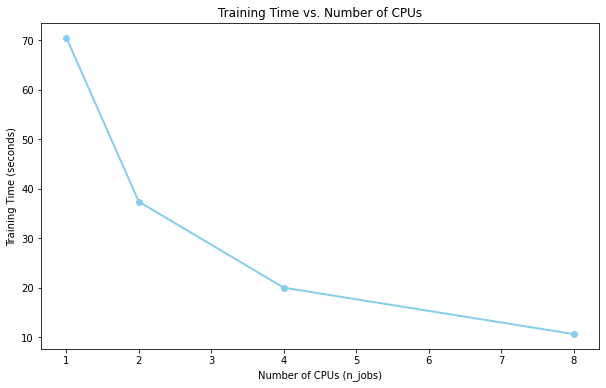

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(cpu_settings, time_results, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.xlabel("Number of CPUs (n_jobs)")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs. Number of CPUs")
plt.show()

**Training Time Decreases with More CPUs:** The plot shows a clear trend where the training time decreases as the number of CPUs increases. As you go from 1 CPU to 8 CPUs, the training time drops significantly. This indicates that the model is highly parallelizable and can efficiently leverage multiple CPUs to speed up the training process. The reduction in time between each step (e.g., from 1 to 2 CPUs, 2 to 4 CPUs, etc.) demonstrates how the task is scaled across different processors.

#### 3. Request 4 cores on Discovery via OOD for Dask distributed scheduler and set processes=False. (4 pts)

In [18]:
client = Client(processes=False)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://10.99.253.24:8787/status,
Dashboard: http://10.99.253.24:8787/status,Workers: 1
Total threads: 8,Total memory: 5.00 GiB
Status: running,Using processes: False
Comm: inproc://10.99.253.24/30864/1,Workers: 1
Dashboard: http://10.99.253.24:8787/status,Total threads: 8
Started: Just now,Total memory: 5.00 GiB
Comm: inproc://10.99.253.24/30864/4,Total threads: 8
Dashboard: http://10.99.253.24:38031/status,Memory: 5.00 GiB
Nanny: None,


In [19]:
client.close()

In [20]:
client.status

'closed'

#### 4. Use dask xgboost on 4 CPUs (5 pts) and dask distributed scheduler (5 pts) with n_workers=4, threads_per_worker=1 to train the model and get the calculation time. Compare (3 pts) the calculation time of dask xgboost with the time of xgboost model on 4 CPUs. (13 pts)

In [21]:
# Start a Dask Client with 4 workers, each with a single thread
client = Client(n_workers=4, threads_per_worker=1)
client

/shared/centos7/anaconda3/2022.05/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/shared/centos7/anaconda3/2022.05/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/shared/centos7/anaconda3/2022.05/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 5.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44929,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: 1 minute ago,Total memory: 5.00 GiB
Comm: tcp://127.0.0.1:41640,Total threads: 1
Dashboard: http://127.0.0.1:45325/status,Memory: 1.25 GiB
Nanny: tcp://127.0.0.1:36038,


In [22]:
# # Convert pandas DataFrame to Dask DataFrame and Array
X_train_d = dd.from_pandas(X_train, npartitions=4)
y_train_d = da.from_array(y_train, chunks=X_train_d.map_partitions(len).compute().to_list())

In [23]:
X_train_d

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
npartitions=4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
15449,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30867,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46409,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61877,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [24]:
y_train_d

dask.array<array, shape=(49502,), dtype=int64, chunksize=(12376,), chunktype=pandas.Series>

In [25]:
start_time = time.time()
dxgb.train(client, {'verbosity': 0}, X_train_d, y_train_d, num_boost_round=10)
dask_training_time = time.time() - start_time

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/home/chaudhary.ans/.local/lib/python3.9/site-packages/dask_xgboost/tracker.py", line 365, in join
    while self.thread.isAlive():
AttributeError: 'Thread' object has no attribute 'isAlive'
/home/chaudhary.ans/.local/lib/python3.9/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(
/home/chaudhary.ans/.local/lib/python3.9/site-packages/dask_xgboost/__init__.py:7: UserWarning: Dask-XGBoo

In [26]:
print('Time taken to train Dask xgboost: ', dask_training_time)

Time taken to train Dask xgboost:  6.705711126327515


In [27]:
# 4 core comparison
compare_dict ={
    "Dask xgboost":dask_training_time,
    "xgboost njob":time_results[2]
}

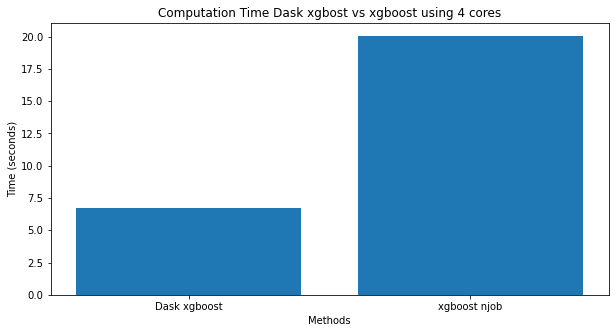

In [28]:
# Bar Chart comparing different Dask Chunk Size
plt.figure(figsize=(10, 5))
plt.bar(compare_dict.keys(), compare_dict.values())

# Add title and labels
plt.title("Computation Time Dask xgbost vs xgboost using 4 cores")
plt.xlabel("Methods")
plt.ylabel("Time (seconds)")

# Show the plot
plt.show()

**The results show two distinct execution times:**
 - Dask XGBoost: 6.864945888519287 seconds
 - XGBoost with njobs=4: 20.394912004470825 seconds

**Analysis:**
- Efficiency: Dask XGBoost demonstrated superior efficiency, completing the task in roughly one-third of the time taken by regular XGBoost.
- Scalability: The results suggest that Dask XGBoost scales better with multiple CPUs, likely due to its distributed computing architecture.
- Resource Utilization: Dask XGBoost appears to make more effective use of the available CPU resources, possibly through better data partitioning and task distribution.

In [29]:
client.close()